In [8]:
import numpy as np   #一个python数学计算库
import pandas as pd  #处理图像表格的库
import statsmodels.api as sm # python计量经济学的一个库吧，统计也会用
import matplotlib.pyplot as plt
from sklearn import linear_model   #python的一个机器学习库

In [2]:
file=pd.read_csv("cropland.txt")
print(file.head())

   temperature  fields  cultivated  percentCultivated
0    13.184750      63          49           0.777778
1    12.356800     165         147           0.890909
2    17.578825      38          30           0.789474
3    20.868671     152          95           0.625000
4    13.880837      88          69           0.784091


# Linear Regression

In [4]:
temperature = np.array(file['temperature']).reshape(-1,1)
temperature_ = sm.add_constant(temperature, prepend=False)
fields = np.array(file['fields']).reshape(-1,1)
cultivated = np.array(file['cultivated']).reshape(-1,1)
percentCultivated = np.array(file['percentCultivated']).reshape(-1,1)
lsfit = sm.OLS(percentCultivated,temperature_).fit()
print(lsfit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 2.051e+04
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:45:55   Log-Likelihood:                 4929.3
No. Observations:                3144   AIC:                            -9855.
Df Residuals:                    3142   BIC:                            -9843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0335      0.000   -143.230      0.0

# Linear Regression with target transform

In [6]:
p = percentCultivated
eps = 1e-4
p[p==1]=p[p==1]-eps
z = np.log(p/(1-p))
lsfit2 = sm.OLS(z,temperature_).fit()
print(lsfit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     5873.
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:47:03   Log-Likelihood:                -2675.4
No. Observations:                3144   AIC:                             5355.
Df Residuals:                    3142   BIC:                             5367.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2013      0.003    -76.632      0.0

# Logistic Regression

In [7]:
x_temp = np.concatenate([cultivated,fields - cultivated], axis=1)
temperature_ = sm.add_constant(temperature, prepend=False)  # R的版本自动增加了常数项，所以结果不一样，这里也加上
logitfit = sm.GLM(x_temp,temperature_,family=sm.families.Binomial()).fit()
print(logitfit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3142
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -9051.0
Date:                Sun, 14 Apr 2019   Deviance:                       3216.7
Time:                        11:49:53   Pearson chi2:                     37.6
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1892      0.001   -191.145      0.000      -0.191      -0.187
const          4.2670      0.017    245.340      0.0

In [9]:
mintemp = -5
maxtemp = 40
X = np.arange(mintemp,maxtemp,1).reshape(-1,1)
X_ = sm.add_constant(X, prepend=False)  # 加上常数项，值为1
logitpred = logitfit.predict(X_)
lspred = lsfit.predict(X_)
zpred = lsfit2.predict(X_)
lspred2 = np.exp(zpred)/(1+np.exp(zpred))

# Plot

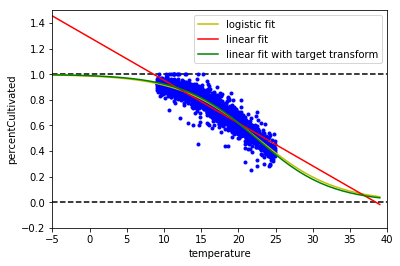

In [11]:
x = temperature.reshape(-1)
y = percentCultivated.reshape(-1)
plt.plot(x,y,'.b')
plot1, = plt.plot(X.reshape(-1),logitpred.reshape(-1),'-y')
plot2, = plt.plot(X.reshape(-1),lspred.reshape(-1),'-r')
plot3, = plt.plot(X.reshape(-1),lspred2.reshape(-1),'-g')
plt.title('')
plt.xlabel('temperature')
plt.ylabel('percentCultivated')
plt.xlim(mintemp,maxtemp)
plt.ylim(-0.2,1.5)
plt.hlines(0, mintemp, maxtemp,colors = "k", linestyles = "dashed")
plt.hlines(1, mintemp, maxtemp,colors = "k", linestyles = "dashed")
plt.legend(handles=[plot1,plot2,plot3],labels=['logistic fit','linear fit', 'linear fit with target transform'], loc='upper right')
plt.show()